<h1 style="font-family:verdana;"> <center>📚 Introduction 📚</center> </h1>

***
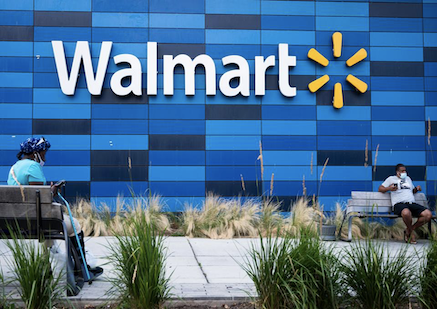
<br>
<br>

<div class="alert alert-block alert-info" style="font-size:15px; font-family:verdana; line-height: 1.4em;">
    <center>
        📌 In this kernel,we will forecast future sales at <span style="color:crimson;">Walmart</span> based on heirarchical sales in the states of <span style="color:crimson;">California, Texas, and Wisconsin.<span></center> 


<br>
    <center>
Forecasting sales, revenue, and stock prices is a classic application of machine learning in economics, and it is important because it allows investors to make guided decisions based on forecasts made by algorithms.
    </center>
<br> 
    <center>
In this kernel, brief explaination of the structure of dataset will be provided. Then, we will visualize the dataset using Matplotlib and Plotly. And finally, I will demonstrate how this problem can be approached with a variety of forecasting algorithms. 
    </center> 
</div>

***

<blockquote>
    <p style="font-size:16px; color:#159364; font-family:verdana;">
    If you find this kernel interesting, please give an upvote.😃
    </p>
</blockquote>


<center> <h2>Import Libraries</h2> </center>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as plty
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import pywt

%matplotlib inline

<center> <h2>Load Data</h2> </center>

In [ ]:
INPUT_DIR = '../input/m5-forecasting-accuracy'
calendar_df = pd.read_csv(INPUT_DIR+'/calendar.csv')
sell_prices_df = pd.read_csv(INPUT_DIR+'/sell_prices.csv')
sales_train_validation_df = pd.read_csv(INPUT_DIR+'/sales_train_validation.csv')

<center> <h3 style='color:#757575;'>Create samples</h3> </center>

In [ ]:
d_columns = sales_train_validation_df.columns[6:]

sample_1 = sales_train_validation_df.iloc[1][d_columns]
sample_2 = sales_train_validation_df.iloc[11][d_columns]
sample_3 = sales_train_validation_df.iloc[21][d_columns]


<center> <h3 class="text-muted">Plot Samples</h3> </center>

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(sample_1)),
                        y=sample_1,showlegend=False, mode='lines',
                        name='First Sample',marker_color='#0C629F'), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(len(sample_2)),
                        y=sample_2,showlegend=False, mode='lines',
                        name='Second Sample',marker_color='#F36F62'), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=np.arange(len(sample_3)),
                        y=sample_3,showlegend=False, mode='lines',
                        name='Third Sample',marker_color='#68D9D6'), 
              row=3, col=1)

fig.update_layout(height=1200, width=1000, title_text="Sample sales", template='plotly_white')

fig.show()


<center><h3 class="text-muted"> Sample Data <span class="badge badge-pill badge-info" style='font-size:20px'>Zoomed</span></h3> </center>


In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(sample_1[200:300])),
                        y=sample_1[200:300],showlegend=False, mode='lines+markers',
                        name='First Sample',marker_color='#64B8F3'), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(len(sample_2[200:300])),
                        y=sample_2[200:300],showlegend=False, mode='lines+markers',
                        name='Second Sample',marker_color='#F36F62'), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=np.arange(len(sample_3[200:300])),
                        y=sample_3[200:300],showlegend=False, mode='lines',
                        name='Third Sample',marker_color='#68D9D6'), 
              row=3, col=1)

fig.update_layout(height=900, width=900, title_text="Sample sales", template='plotly_white')

fig.show()

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Observations :</li>
  </ol>
</nav>
In the above plots, we can clearly see that the sales data is very erratic and volatile. Sometimes, the sales are zero for a few days in a row, and at other times, it remains at its peak value for a few days. Therefore, we need some sort of "denoising" techniques to find the underlying trends in the sales data and make forecasts


<center><h3 style='color:#5665EF'> Wavelet denoising</h3></center>

<p style='color:#646464'>Wavelet denoising (usually used with electric signals) is a way to remove the unnecessary noise from a time series. This method calculates coefficients called the "wavelet coefficients". These coefficients decide which pieces of information to keep (signal) and which ones to discard (noise).
    <br>We make use of the <b>MAD</b> (mean absolute deviation) value to understand the randomness in the sales and accordingly decide the minimum threshold for the wavelet coefficients in the time series. We filter out the low coefficients from the wavelets and reconstruct the sales data from the remaining coefficients and that's it; we have successfully removed noise from the sales data.</p>


In [ ]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

In [ ]:
denoised_1 = denoise_signal(sample_1[200:300])
denoised_2 = denoise_signal(sample_2[200:300])
denoised_3 = denoise_signal(sample_3[200:300])

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(100),
                        y=sample_1[200:300],showlegend=False, mode='lines',
                        name='Original',marker_color='#64B8F3'), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(200),
                        y=denoised_1,showlegend=False, mode='lines',
                        name='Denoised',marker_color='#0C629F'), 
              row=1, col=1)




fig.add_trace(go.Scatter(x=np.arange(100),
                        y=sample_2[200:300],showlegend=False, mode='lines',
                        name='Original',marker_color='#F2B963'), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=np.arange(100),
                        y=denoised_2,showlegend=False, mode='lines',
                        name='Denoised',marker_color='#F36F62'), 
              row=2, col=1)



fig.add_trace(go.Scatter(x=np.arange(100),
                        y=sample_3[200:300],showlegend=False, mode='lines',
                        name='Original',marker_color='#A9E9E7'), 
              row=3, col=1)
fig.add_trace(go.Scatter(x=np.arange(100),
                        y=denoised_3,showlegend=False, mode='lines',
                        name='Denoised',marker_color='#20817D'), 
              row=3, col=1)

fig.update_layout(height=900, width=900, title_text="Original Signal vs Denoised", template='plotly_white')

fig.show()

<center><h3 style='color:#5665EF'>Average smoothing</h3></center>
<p style='color:#646464'>
Average smoothing is a relatively simple way to denoise time series data. In this method, we take a "window" with a fixed size (like 10). <br>We first place the window at the beginning of the time series (first ten elements) and calculate the mean of that section. We now move the window across the time series in the forward direction by a particular "stride", calculate the mean of the new window and repeat the process, until we reach the end of the time series. All the mean values we calculated are then concatenated into a new time series, which forms the denoised sales data.

In [ ]:
def average_smoothing(signal, kernel_size=3, stride=1):
    sample = []
    start = 0
    end = kernel_size
    while end <= len(signal):
        start = start + stride
        end = end + stride
        sample.extend(np.ones(end - start)*np.mean(signal[start:end]))
    return np.array(sample)

In [ ]:
denoised_1 = average_smoothing(sample_1[200:300])
denoised_2 = average_smoothing(sample_2[200:300])
denoised_3 = average_smoothing(sample_3[200:300])

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(100),
                        y=sample_1[200:300],showlegend=False, mode='lines',
                        name='Original',marker_color='#64B8F3'), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(100),
                        y=denoised_1,showlegend=False, mode='lines',
                        name='Denoised',marker_color='#0C629F'), 
              row=1, col=1)




fig.add_trace(go.Scatter(x=np.arange(100),
                        y=sample_2[200:300],showlegend=False, mode='lines',
                        name='Original',marker_color='#F2B963'), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=np.arange(100),
                        y=denoised_2,showlegend=False, mode='lines',
                        name='Denoised',marker_color='#F36F62'), 
              row=2, col=1)



fig.add_trace(go.Scatter(x=np.arange(100),
                        y=sample_3[200:300],showlegend=False, mode='lines',
                        name='Original',marker_color='#A9E9E7'), 
              row=3, col=1)
fig.add_trace(go.Scatter(x=np.arange(100),
                        y=denoised_3,showlegend=False, mode='lines',
                        name='Denoised',marker_color='#20817D'), 
              row=3, col=1)

fig.update_layout(height=900, width=900, title_text="Original Signal vs Denoised", template='plotly_white')

fig.show()

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Observations :</li>
  </ol>
</nav>
<p>
We can see that average smoothing is not as effective as Wavelet denoising at finding macroscopic trends and pattersns in the data. A lot of the noise in the original sales persists even after denoising. Therefore, wavelet denoising is clearly more effective at finding trends in the sales data. Nonetheless, average smoothing or "rolling mean" can also be used to calculate useful features for modeling.
</p>

<center> <h2> Creating Time Series Sales Data </h2></center>

In [ ]:
store_ids = set(sales_train_validation_df['store_id'])
sales_df = sales_train_validation_df.set_index('id')[d_columns] \
    .T \
    .merge(calendar_df.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

sales_df.index = pd.to_datetime(sales_df.index)

In [ ]:
fig = go.Figure()
for store in store_ids:
    store_columns = [c for c in sales_df.columns if store in c]
    df = sales_df[store_columns].sum(axis=1)
    df.columns = ['date','sum']
    df = df.groupby(pd.Grouper(freq="M")).mean()
    fig.add_trace(go.Scatter(x=df.index, y=df, name=store))

fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Monthy Average Sales (per store)", template='plotly_white',
                     xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='12m', step='month', stepmode='backward'),
                dict(count=18, label='18m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    ))

<h3>
Click on buttons <button type="button" class="btn btn-secondary">6m</button> <button type="button" class="btn btn-secondary">12m</button> <button type="button" class="btn btn-secondary">18m</button> to get 6,12 & 18 months detailed report above
</h3>
<hr>
<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Observations :</li>
  </ol>
</nav>
<p>

<li>There is obvious depression in sales in the months of November or December.</li>
<li>After fall in sales, in the coming new year months (Jan & Feb) the sales seems to have climbed up </li>
<li>The peak sales for each year is observed between July and September
    
</p>

<center><h3><span style="color:#7F5D51;">California, Texas, and Wisconsin.</span></h3></center>

In [ ]:
fig = go.Figure()
for store in store_ids:
    store_columns = [c for c in sales_df.columns if store[:2] in c]
    df = sales_df[store_columns].sum(axis=1)
    df.columns = ['date','sum']
    df = df.groupby(pd.Grouper(freq="M")).mean()
    fig.add_trace(go.Scatter(x=df.index, y=df, name=store[:2]))

fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Monthy Average Sales CA vs TX vs WI", template='plotly_white',
                     xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='12m', step='month', stepmode='backward'),
                dict(count=18, label='18m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    ))
fig.update_traces(showlegend=True)

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Observations :</li>
  </ol>
</nav>
<p>

<li>Sales from California have been the highest</li>
<li>Texas and Winston have shown roughly the same amount of sales </li>
<li>The rise and fall in sales have been similar for the three states in 5 years</li>
    
</p>

In [ ]:
fig = go.Figure()
for store in store_ids:
    store_columns = [c for c in sales_df.columns if store in c]
    data = sales_df[store_columns].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=store))

fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (per store)", template='plotly_white')

Almost every sales curve has "linear oscillation" trend at the macroscopic level. Basically, the sales oscillate like a sine wave about a certain mean value, but this mean value has an upward linear trend. This implies that the sales are oscillating at a higher and higher level every few months.

This trend is reminiscent of the business cycle, where economies have short-term oscillatory fluctuations but grow linearly in the long run.

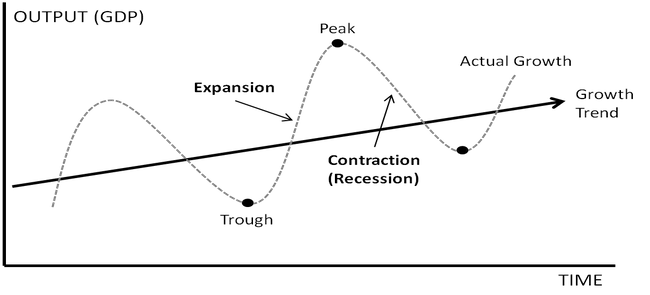

In [ ]:
fig = go.Figure()
for store in store_ids:
    store_columns = [c for c in sales_df.columns if store in c]
    data = sales_df[store_columns].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Box(x=[store]*1913, y=data, name=store))

fig.update_layout(height=500, width=800,yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (per store)", template='plotly_white')

<center> <h2> Creating Train and Validation sets </h2></center>

In [ ]:
train_df = sales_df[-100:-30]
val_df = sales_df[-30:]

In [ ]:
fig = make_subplots(rows=3, cols=1)

for idx in range(3):
    fig.add_trace(go.Scatter(x=train_df.index, y=train_df[train_df.columns[idx]]), row=idx+1, col=1)
    fig.add_trace(go.Scatter(x=val_df.index, y=val_df[val_df.columns[idx]]), row=idx+1, col=1)

fig.update_layout(height=900, width=900, title_text="Train & Validation", template='plotly_white')

<h2>The Augmented Dicky-Fuller test</h2>
<li>Tests for trend non-stationary</li>
<li>Null hypothesis is time series is non-stationary</li>


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df[train_df.columns[0]])
print('Test Statistic : ',result[0])
print('P-value : ',np.round(result[1],decimals=15))

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Conclusion :</li>
  </ol>
</nav>

<li  style="font-size:16px">T-statistic = -7.2, More negative means likey to be stationary</li>
<li style="font-size:16px">P-value < 0.05, Hence we reject the Null hypothesis that Time series is non-Stationary, which concludes that our data is stationary </li>


<center><h2>Auto-Correlation & Partial Auto-Correlation functions</h2></center>
<p>
     After a time series has been stationarized, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.
</p>

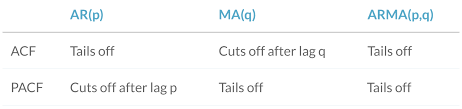


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_ = plot_acf(train_df[train_df.columns[0]], lags=10, zero=False, alpha=0.05)
_ = plot_pacf(train_df[train_df.columns[0]], lags=10, zero=False, alpha=0.05)

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Observation :</li>
  </ol>
</nav>

Both ACF & PACF plots tail-off and represent a sinusoidal wave. Hence our data best represents ARMA model.

<center><h2>Using the ARIMA Model</h2></center>
The name ARMA is short for Autoregressive Moving Average. It comes from merging two simpler models – the Autoregressive, or AR, and the Moving Average, or MA. In analysis, we tend to put the residuals at the end of the model equation, so that’s why the “MA” part comes second. Of course, this will become apparent once we examine the equation.
<br><br>
<b>What does a simple ARMA model look like?</b>
<br><br>
Let’s suppose that “Y” is some random time-series variable. Then, a simple Autoregressive Moving Average model would look something like this:

<br><br>
<center><b>yt = c + ϕ1 yt-1 + θ1 ϵ t-1 + ϵ t</b></center>
<br><br>
<h3>Searching model order over AIC and BIC</h3>
<b>AIC : Akaike Information Criterion</b> 
<li>Lower AIC indicates a better model</li>
<br>
<b>BIC : Bayesian Information Criterion</b> 
<li>Similar to AIC</li>
<li>Lower BIC indicates a better model</li>

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order_aic_bic = []
# Loop over AR order
for p in range(3):
    #Loop over MA order
    for q in range(3):
        try:
            model = SARIMAX(train_df[train_df.columns[0]],order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))

order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

order_df

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Conclusion :</li>
  </ol>
</nav>

Both AIC & BIC values were found to be lowest for AR order(p)=1 and MA order(q)=1

<center><h3>Fitting ARIMA model with order(1,1)</h3></center>

In [ ]:
model = SARIMAX(train_df[train_df.columns[0]],order=(1,0,1))
results = model.fit()

residuals = results.resid
# Mean Absolute Error
mae = np.mean(np.abs(residuals))
print('Mean Absoulte Error : ', mae)


results.plot_diagnostics(figsize=(18,10))
_ = plt.show()

<nav aria-label="breadcrumb">
  <ol class="breadcrumb">
    <li class="breadcrumb-item active" aria-current="page">Observations :</li>
  </ol>
</nav>

<li><b>Standardize Residuals: </b> There is no obvious structure in the residuals, hence our model has worked correctly</li>
<li><b>Histogram plus estimated Density: </b> The green and orange lines are almost the same, hence our model is good </li>
<li><b>Normal Q-Q: </b> The dots are not aligned with the red line, which states that our model residuals are not normally distributed</li>
<li><b>Correlogram: </b> There is no significant correlation in the residuals, it means that our model has captured most of the information in the data that is required</li>

In [ ]:
results.summary()

Prob(Q) = 0.22(>0.05) , Hence we accept the null hypothesis that residuals are not correlated.(Observed the same in the above Correlogram plot)
<br>
Prob(JB) = 0 (<0.05) , indicates that the residuals are not normally distributed, 

<center><h2>Predictions</h2></center>

In [ ]:
predictions = []

for idx in range(3):
    model = SARIMAX(train_df[train_df.columns[idx]],order=(1,0,1))
    results = model.fit()
    predictions.append(results.forecast(30))

predictions = np.array(predictions).reshape((-1, 30))

In [ ]:
fig = make_subplots(rows=3, cols=1)

for idx in range(3):
    fig.add_trace(go.Scatter(x=train_df.index, y=train_df[train_df.columns[idx]]), row=idx+1, col=1)
    fig.add_trace(go.Scatter(x=val_df.index, y=val_df[val_df.columns[idx]]), row=idx+1, col=1)
    fig.add_trace(go.Scatter(x=val_df.index, y=predictions[idx]), row=idx+1, col=1)
    
fig.update_layout(height=900, width=900, title_text="Predictions ARIMA", template='plotly_white')


<h2> Seasonal Arima </h2>

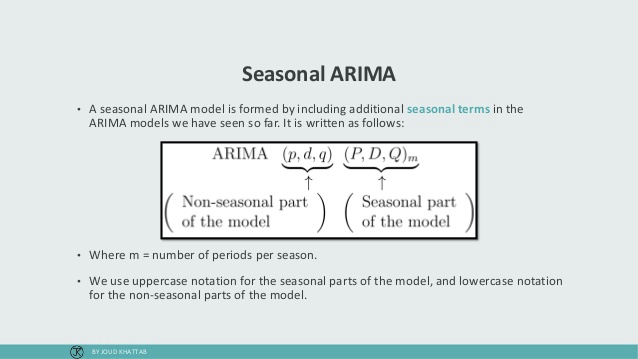

<center><h2>Seasonal Decomposition</h2></center>
<br>
<b>Time Series = Trend + Season + Residual

In [ ]:
# Identifying seasonal periods
_ = plot_acf(train_df[train_df.columns[0]], zero=False, lags=20)

We could observe 11 seasonal periods from the acf function

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(train_df[train_df.columns[0]], freq=11)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

<center><h2> Modelling with SARIMA</h2></center>

In [ ]:
!pip install -q pmdarima

### Searching over model orders to find the best one

In [ ]:

import pmdarima as pm


results = pm.auto_arima(train_df[train_df.columns[0]],
                           d=0, # Non-Seasonal difference order
                           start_p=1, #Initial guess for p
                           start_q=1, #Intial guess for q
                           max_p=3, 
                           max_q=3,
                           seasonal=True , #Times series is seasonal
                           m=11, #Seasonal Period
                           D=1, #Seasonal Difference order
                           start_P=1, #Initial guess for P
                           start_Q=1, #Intial guess for Q
                           max_P=2, 
                           max_Q=2,
                           information_criterion='aic', #To select Best model
                           trace = True, #print results while training
                           error_action = 'ignore', #ignore orders that don't work
                           stepwise=True #Apply intelligent order search
                           )


In [ ]:
predictions = []

for idx in range(3):
    model = SARIMAX(train_df[train_df.columns[idx]],order=(0,0,0), seasonal_order=(1,1,1,11), trend='c')
    results = model.fit()
    predictions.append(results.forecast(30))

predictions = np.array(predictions).reshape((-1, 30))

In [ ]:
fig = make_subplots(rows=3, cols=1)

for idx in range(3):
    fig.add_trace(go.Scatter(x=train_df.index, y=train_df[train_df.columns[idx]]), row=idx+1, col=1)
    fig.add_trace(go.Scatter(x=val_df.index, y=val_df[val_df.columns[idx]]), row=idx+1, col=1)
    fig.add_trace(go.Scatter(x=val_df.index, y=predictions[idx]), row=idx+1, col=1)
    
fig.update_layout(height=900, width=900, title_text="Predictions: Seasonal ARIMA", template='plotly_white')

<center><h2>Modelling on Entire one year of data of California</h2></center>

In [ ]:
# Creating monthly average for CA
store_columns = [c for c in sales_df.columns if 'CA' in c]
df = sales_df[store_columns].sum(axis=1)
df.columns = ['date','sum']
df = df.groupby(pd.Grouper(freq="M")).mean()

In [ ]:
train_df = df.loc['2012-12-31':'2015-12-31']
val_df = df.loc['2015-12-31':]

In [ ]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=train_df.index, y=train_df, name='train'), row=1, col=1)
fig.add_trace(go.Scatter(x=val_df.index, y=val_df, name='validation'), row=1, col=1)

fig.update_layout(height=500, width=700, title_text="Train & Validation", template='plotly_white')

### Find Seasonal Order

In [ ]:
_ = plot_acf(train_df, lags=30, zero=False)

**We have confirmed from ACF plot that the seasonal period is of <span style="color:crimson;">12 months</span>(number of lines between two peaks including the two)**

In [ ]:
train_df_diff

In [ ]:
import pmdarima as pm


results = pm.auto_arima(train_df,
                           d=0, # Non-Seasonal difference order
                           start_p=1, #Initial guess for p
                           start_q=1, #Intial guess for q
                           max_p=3, 
                           max_q=3,
                           seasonal=True , #Times series is seasonal
                           m=12, #Seasonal Period
                           D=2, #Seasonal Difference order
                           start_P=1, #Initial guess for P
                           start_Q=1, #Intial guess for Q
                           max_P=2, 
                           max_Q=2,
                           information_criterion='aic', #To select Best model
                           trace = True, #print results while training
                           error_action = 'ignore', #ignore orders that don't work
                           stepwise=True #Apply intelligent order search
                           )

## Forecasting next 12 months Data for California

In [ ]:
predictions = []


model = SARIMAX(train_df,order=(1,0,1), seasonal_order=(2,2,0,12), trend='c')
results = model.fit()
predictions = results.forecast(11)

In [ ]:
fig = make_subplots(rows=1, cols=1)

dates = pd.date_range(start='2015-12-31', periods=12, freq='M')
fig.add_trace(go.Scatter(x=train_df.index, y=train_df, name='train'), row=1, col=1)
fig.add_trace(go.Scatter(x=val_df.index, y=val_df, name='validation'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=predictions, name='prediction'), row=1, col=1)
    
fig.update_layout(height=500, width=700, title_text="Predictions: Seasonal ARIMA", template='plotly_white')